In [1]:
pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Path ke dataset
train_dir = 'fast-food-dataset/train'
val_dir = 'fast-food-dataset/test'

In [4]:
# Preprocessing & Augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [8]:

# Bangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas: burger, pizza, fries
])




d:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [10]:
# Training
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)



d:\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.3176 - loss: 1.6410 - val_accuracy: 0.3350 - val_loss: 1.0964
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.4167 - loss: 1.0798 - val_accuracy: 0.3667 - val_loss: 1.1250
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.4181 - loss: 1.0665 - val_accuracy: 0.4500 - val_loss: 1.0985
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.5274 - loss: 0.9701 - val_accuracy: 0.4867 - val_loss: 1.0852
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 388ms/step - accuracy: 0.5355 - loss: 0.9309 - val_accuracy: 0.5100 - val_loss: 1.0149
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.6169 - loss: 0.8360 - val_accuracy: 0.5517 - val_loss: 1.0578
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 380ms/step - accuracy: 0.6643 - loss: 0.7678 - val_accuracy: 0.5400 - val_loss: 1.0516
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 409ms/step - accuracy: 0.6805 - loss: 0.7553 - val_accu

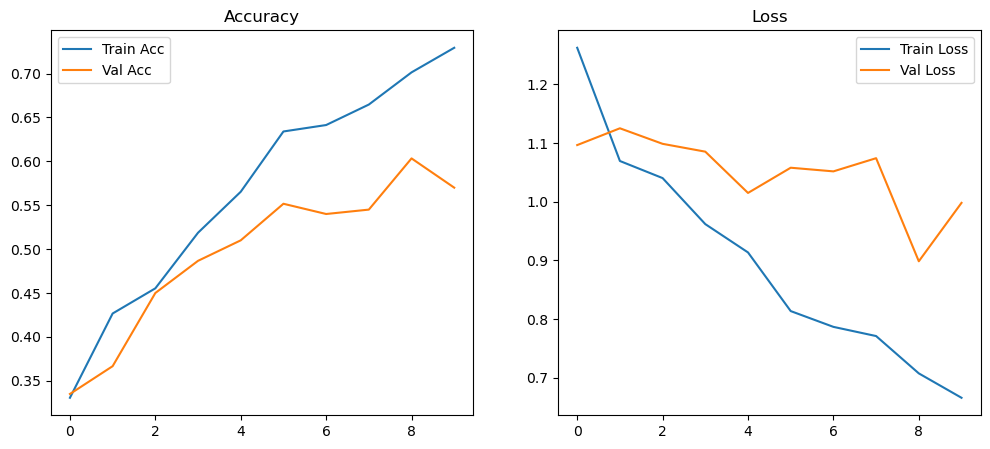

In [11]:
# Plot akurasi & loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


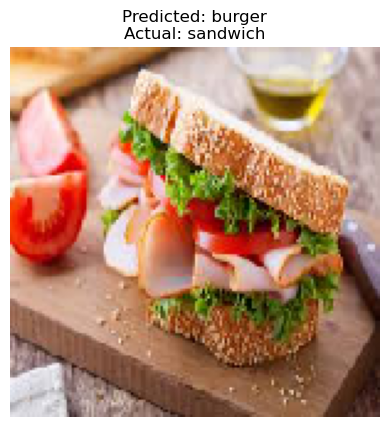

In [14]:
import numpy as np
import random
import os
from tensorflow.keras.preprocessing import image

# Path ke folder test
test_dir = 'fast-food-dataset/test'  #

# Ambil daftar kelas (nama folder)
class_names = os.listdir(test_dir)

# Pilih kelas secara acak
random_class = random.choice(class_names)

# Ambil gambar secara acak dari kelas tersebut
random_image_file = random.choice(os.listdir(os.path.join(test_dir, random_class)))

# Path lengkap ke gambar
img_path = os.path.join(test_dir, random_class, random_image_file)

# Load dan proses gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi

# Prediksi
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Tampilkan hasil
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nActual: {random_class}")
plt.axis('off')
plt.show()


In [15]:
# Simpan dalam format HDF5 (.h5)
model.save("fastfood_cnn_model.h5")



In [17]:
from tensorflow.keras.models import load_model

# Load model dari file .h5
model_new = load_model("fastfood_cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


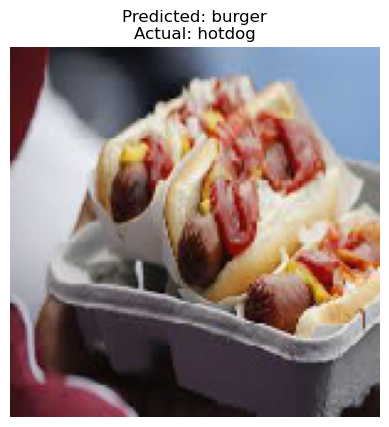

In [18]:
import numpy as np
import random
import os
from tensorflow.keras.preprocessing import image

# Path ke folder test
test_dir = 'fast-food-dataset/test'  #

# Ambil daftar kelas (nama folder)
class_names = os.listdir(test_dir)

# Pilih kelas secara acak
random_class = random.choice(class_names)

# Ambil gambar secara acak dari kelas tersebut
random_image_file = random.choice(os.listdir(os.path.join(test_dir, random_class)))

# Path lengkap ke gambar
img_path = os.path.join(test_dir, random_class, random_image_file)

# Load dan proses gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi

# Prediksi
prediction = model_new.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Tampilkan hasil
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nActual: {random_class}")
plt.axis('off')
plt.show()
